Let's go through a different metrics for the Filecoin network!

Filecoin data can be obtained from multiple sources. The most reliable data will be the actual nodes. 
However, these won't usually let us get all the historical data we want! For that, we can use services like [Spacescope](https://docs.spacescope.io/).

In [1]:
import requests
import os

import altair as alt
import pandas as pd


## Deals

In [2]:
SPACESCOPE_TOKEN = os.environ.get("SPACESCOPE_TOKEN")


In [3]:
url = "https://api.spacescope.io/v2/deals/deal_size?start_date=2023-04-01&end_date=2023-05-11"

response = requests.request(
    "GET", url, headers={"authorization": f"Bearer {SPACESCOPE_TOKEN}"}, data={}
)


In [22]:
df = pd.DataFrame(response.json()["data"])
df.sample(5)


,stat_date,total_regular_deal_size,total_verified_deal_size,active_regular_deal_size,active_verified_deal_size,daily_activated_regular_deal_size,daily_activated_verified_deal_size,daily_proposed_regular_deal_size,daily_proposed_verified_deal_size,daily_slashed_regular_deal_size,daily_slashed_verified_deal_size,daily_expired_regular_deal_size,daily_expired_verified_deal_size
26,2023-04-27T00:00:00Z,40434730138132000,986376631080370000,1920044334261410,943516496482607000,630689103872,4583911695581180,1176682627072,2810960584458240,0,818191269888,3270967296,112145005543424
38,2023-05-09T00:00:00Z,40442682471374400,1046476735240680000,1864355707061290,971247645052215000,0,1112875728617470,443186937856,5660697715286020,34091302912,1193195601920,8327136,0
12,2023-04-13T00:00:00Z,40422327828667900,924351117120881000,1907830588635360,879936745569305000,1280021889024,4656126055743490,1180411363328,4490480938483710,0,4197491671040,70746112,17542638731264
13,2023-04-14T00:00:00Z,40423001847684600,928751724782993000,1907873976377640,883268493987922000,1994341350400,4269266916327420,674019016704,4394743958011900,17045651456,605120626688,68261675516,10256954425344
15,2023-04-16T00:00:00Z,40424298715471400,938378635057234000,1912801860575440,892679354929865000,1016613306368,4181643876106240,400572809216,4785347185590270,0,2318208598016,11427577856,18470561382400


In [23]:
df = df.assign(
    stat_date=lambda df: pd.to_datetime(df["stat_date"]),
    # Compute PiB metrics for all _size columns
    **{
        col: lambda df, col=col: df[col] / 1024**5
        for col in df.columns
        if col.endswith("_size")
    }
)
df.sample(5)


,stat_date,total_regular_deal_size,total_verified_deal_size,active_regular_deal_size,active_verified_deal_size,daily_activated_regular_deal_size,daily_activated_verified_deal_size,daily_proposed_regular_deal_size,daily_proposed_verified_deal_size,daily_slashed_regular_deal_size,daily_slashed_verified_deal_size,daily_expired_regular_deal_size,daily_expired_verified_deal_size
18,2023-04-19 00:00:00+00:00,35.906926,846.044521,1.701586,806.158916,0.000628,3.814435,0.001075,4.136736,0.000000e+00,0.000484,0.000025,0.022280
24,2023-04-25 00:00:00+00:00,35.911907,870.136154,1.704067,830.012015,0.001302,4.283728,0.000666,3.446521,0.000000e+00,0.023640,0.000066,0.030042
13,2023-04-14 00:00:00+00:00,35.902838,824.897239,1.694532,784.500015,0.001771,3.791871,0.000599,3.903317,1.513958e-05,0.000537,0.000061,0.009110
2,2023-04-03 00:00:00+00:00,35.888225,777.425040,1.681845,734.997733,0.000456,4.094737,0.002543,4.408286,4.731119e-07,0.029012,0.000158,0.067632
40,2023-05-11 00:00:00+00:00,35.921468,939.302819,1.655333,864.607591,0.000061,1.110992,0.000424,4.853475,0.000000e+00,0.000273,0.000000,0.000000


In [32]:
# Latest data
print(
    "There are",
    df[df["stat_date"] == df["stat_date"].max()]["active_verified_deal_size"].values[0],
    "PiB of active verified deals",
)


There are 864.6075909795403 PiB of active verified deals


In [17]:
# Plot of cumulative sum of total_regular_deal_size over time

alt.Chart(df).mark_line().transform_window(
    cumulative_total="sum(daily_activated_verified_deal_size)",
    sort=[{"field": "stat_date"}],
).encode(
    x="stat_date:T",
    y="cumulative_total:Q",
)


alt.Chart(...)

In [33]:
# Altair chart of daily_activated_verified_deal_size over time (stat_date)
c = (
    alt.Chart(df)
    .mark_line()
    .encode(
        x="stat_date:T",
        y="daily_activated_verified_deal_size",
        tooltip=["daily_activated_verified_deal_size", "stat_date"],
    )
    .properties(width=800, height=400, title="Daily Activated Verified Deal Size")
).display()


alt.Chart(...)

# Provider Power

In [56]:
provider_power_daily = pd.read_csv(
    "https://sp-power-daily.feeds.provider.quest/provider-power-daily.csv",
    header=None,
    names=["provider", "date", "avg_raw_byte_power", "avg_quality_adj_power"],
    parse_dates=["date"],
).sort_values("date", ascending=False)


In [57]:
provider_power_daily = provider_power_daily.assign(
    # Transform avg_raw_byte_power and avg_quality_adj_power to PiB
    avg_raw_power_pib=lambda df: df["avg_raw_byte_power"] / 1024**5,
    avg_quality_adj_power_pib=lambda df: df["avg_quality_adj_power"] / 1024**5,
)

provider_power_daily = provider_power_daily.assign(
    avg_raw_power_pib_buquet=pd.cut(
        provider_power_daily["avg_raw_power_pib"],
        bins=[0, 0.1, 1, 5, 10, 25, 50],
    ),
    avg_quality_adj_power_pib_bucket=pd.cut(
        provider_power_daily["avg_quality_adj_power_pib"],
        bins=[0, 0.1, 1, 5, 10, 25, 50],
    ),
)


In [54]:
latest_snapshot = provider_power_daily[
    provider_power_daily["date"] == provider_power_daily["date"].max()
]


In [64]:
%pip install "vegafusion[embed]" --quiet


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
import vegafusion as vf

vf.enable()


vegafusion.enable(mimetype='html', row_limit=10000, embed_options=None)

In [ ]:
# Altair plot of avg_raw_power_pib by date

c = (
    alt.Chart(provider_power_daily)
    .mark_line()
    .encode(
        x="date:T",
        y="sum(avg_raw_power_pib):Q",
        tooltip=["avg_raw_power_pib", "date"],
    )
    .properties(width=800, height=400, title="Average Raw Power (PiB) by Date")
).display()


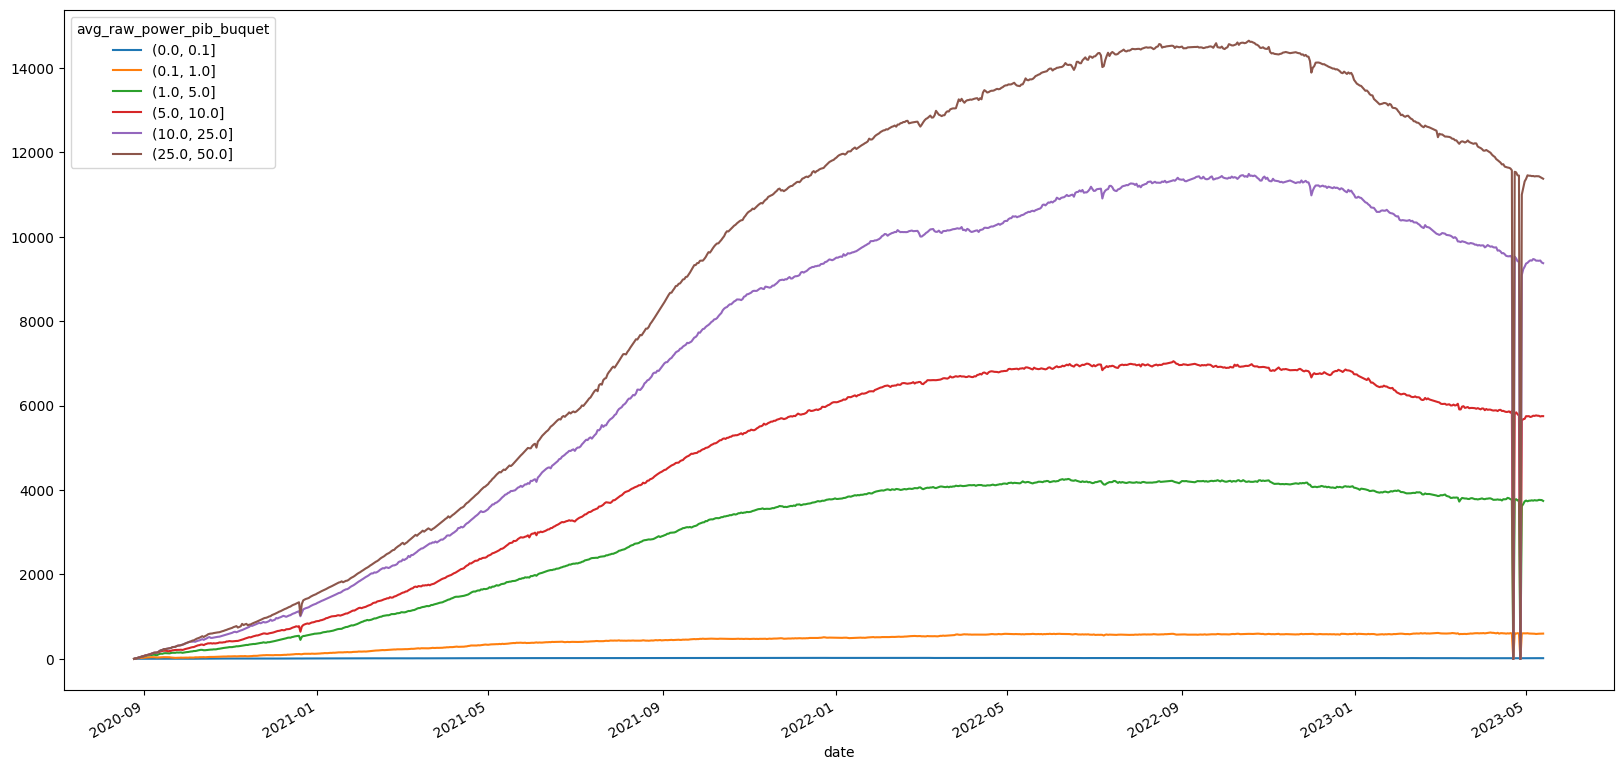

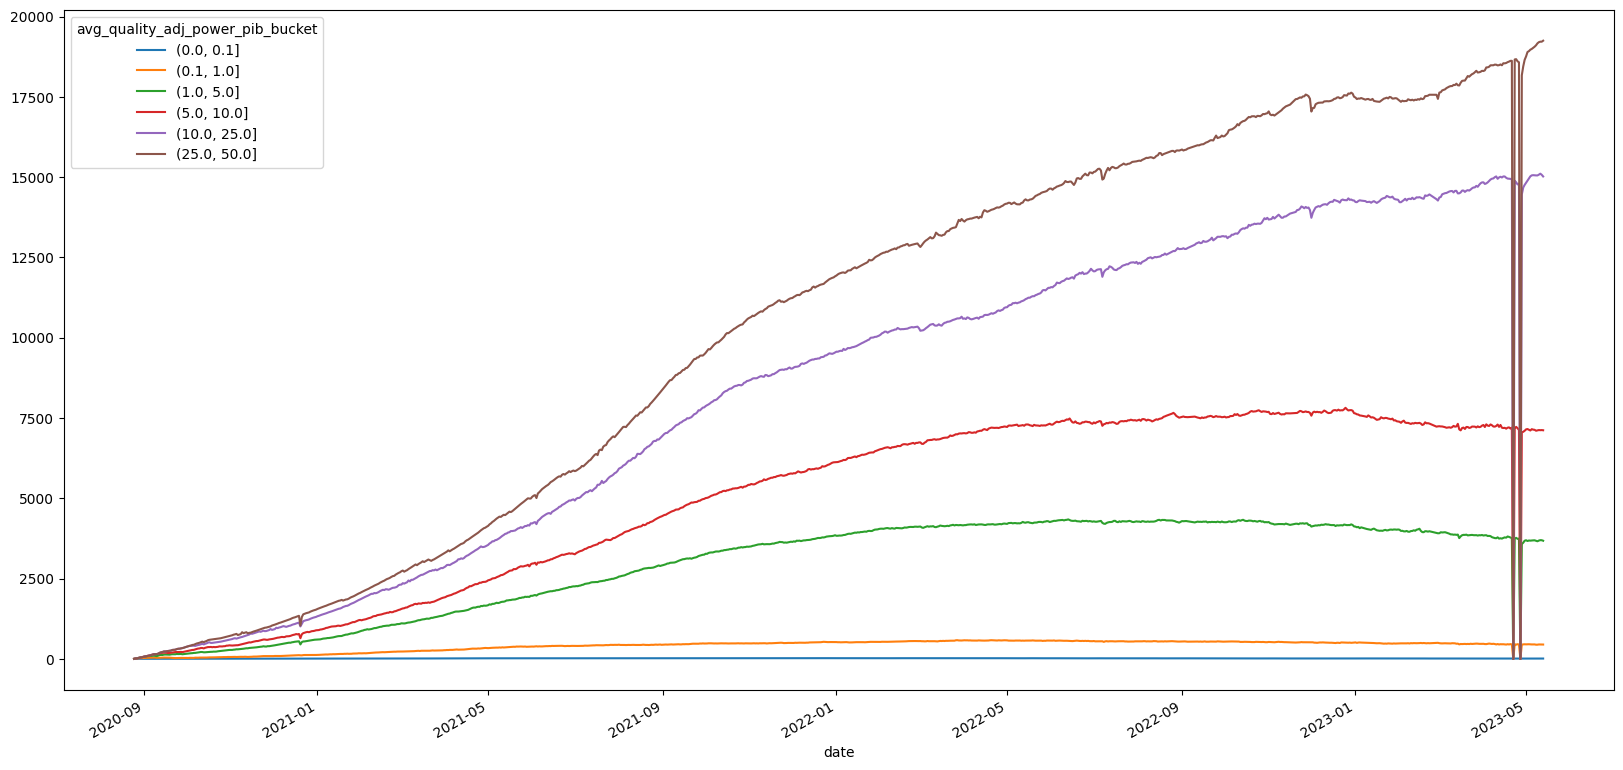

In [62]:
p1 = (
    provider_power_daily.groupby(["date", "avg_raw_power_pib_buquet"])[
        "avg_raw_power_pib"
    ]
    .sum()
    .unstack()
    .plot.line(stacked=True, figsize=(20, 10))
)

p2 = (
    provider_power_daily.groupby(["date", "avg_quality_adj_power_pib_bucket"])[
        "avg_quality_adj_power_pib"
    ]
    .sum()
    .unstack()
    .plot.line(stacked=True, figsize=(20, 10))
)


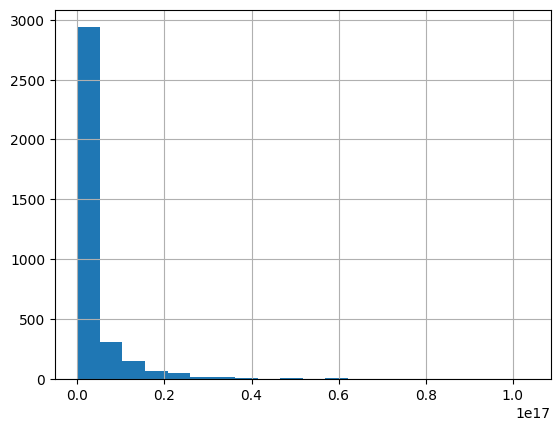

In [14]:
hist = latest_snapshot["avg_raw_byte_power"].hist(bins=20)


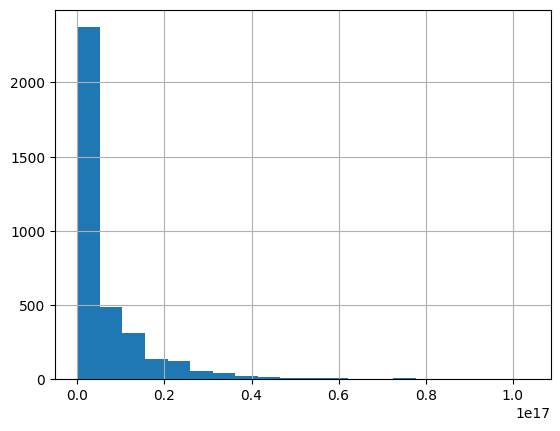

In [15]:
hist = latest_snapshot["avg_quality_adj_power"].hist(bins=20)


## Clients

In [5]:
import requests

# Get datacapstats.io verified clients
verified_clients = requests.get(
    "https://api.datacapstats.io/api/getVerifiedClients"
).json()


In [17]:
verified_clients_df = pd.json_normalize(verified_clients["data"]).drop(
    columns=["allowanceArray"]
)


In [19]:
verified_clients_df


,id,addressId,address,retries,auditTrail,name,orgName,region,website,industry,...,verifierAddressId,createdAtHeight,issueCreateTimestamp,createMessageTimestamp,verifierName,dealCount,providerCount,topProvider,receivedDatacapChange,usedDatacapChange
0,2940,f02146744,f15ef4o3u4vxuf52zrt6gkzraeaqtqngfpz76vfvi,3,n/a,ShenzhenZhongzhi Institute Education Technolog...,,China,http://www.vkshequn.com/,Web3 / Crypto,...,f02049625,2860975,NaN,1684135650,LDN v3.1 multisig,NaN,NaN,None,0,250241974534144
1,2662,f02063175,f1sepnamg7nlvskyopj65a7whgr4zl2kpiybsqy7a,3,n/a,JohnsHopkins University Applied Physics Labora...,,United States,https://bossdb.org/ https://registry.opendata...,Life Science / Healthcare,...,f02049625,2860900,NaN,1684133400,LDN v3.1 multisig,13707.0,20.0,9.55,0,461863603142656
2,2993,f040756,f1folnwfvuomdkrcwwwnzlkqrdtwcw5ytoil4sdii,3,n/a,Glif auto verified,None,None,None,None,...,f0121877,2860895,NaN,1684133250,Jonathan Schwartz,NaN,NaN,None,None,None
3,2661,f02063173,f1qnltkmsy3u3ewqpu5gtkafau2ir47o56pz27y6i,3,n/a,JohnsHopkins University Applied Physics Labora...,,United States,https://bossdb.org/ https://registry.opendata...,Life Science / Healthcare,...,f02049625,2860893,NaN,1684133190,LDN v3.1 multisig,10000.0,16.0,9.43,1099511627776000,229110735437824
4,2930,f02057848,f15uyx2wswq5z63u2b5x5xne7bqritue3dxcgnvvy,3,n/a,National Human Genome Research Instititue,,,,,...,f02049625,2860862,NaN,1684132260,LDN v3.1 multisig,NaN,NaN,None,562949953421312,377957122048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,5,f086680,f1ozspv62aays4owiwzen2xvi22vbymkplaplxrli,-31,n/a,None,None,None,None,None,...,f080476,267564,NaN,1606308120,Philipp Banhardt,0.0,0.0,NaN,0,0
2989,4,f086671,f1lq35h7sk5pdyzymnhh27ywubr7qsnu7cgcwgjla,-31,n/a,None,None,None,None,None,...,f080476,267563,NaN,1606308090,Philipp Banhardt,0.0,0.0,NaN,0,0
2990,3,f024947,f1m7rt4hasnidwe2dqf7475fizb3mn6npur2l4egq,0,https://github.com/keyko-io/filecoin-clients-o...,Protocol Labs,None,,protocol.ai,,...,f080476,249950,1.605802e+09,1605779700,Philipp Banhardt,0.0,0.0,NaN,0,0
2991,2,f019684,f1knbd4nnpdo6omjuvkn5gyz2x4ehz67e76ahfb7a,-31,n/a,None,None,None,None,None,...,f019669,51313,NaN,1599820590,(Testing - Deleted),0.0,0.0,NaN,0,0
